In [338]:
import pandas as pd

### source - https://hackernoon.com/predicting-the-price-of-houses-in-brooklyn-using-python-1abd7997083b
#### Another https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a

####plotting http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

In [393]:
housing_data = pd.read_csv("datasets/housing/brooklyn_sales_map.csv")

In [394]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


In [395]:
housing_data.describe()

,Unnamed: 0,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,...,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
count,390883.000000,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,...,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05
mean,195442.000000,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,...,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03
std,112838.346973,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,...,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04
min,1.000000,3.0,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,3.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,2.143758,1.007072e-01
25%,97721.500000,3.0,1786.000000,21.000000,NaN,11209.000000,1.000000,0.000000,1.000000,0.000000e+00,...,9.892368e+05,165334.750000,30611.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,238.997798,1.938904e+03
50%,195442.000000,3.0,4305.000000,45.000000,NaN,11219.000000,1.000000,0.000000,1.000000,1.900000e+03,...,9.975955e+05,175906.000000,31506.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,249.411350,2.316886e+03
75%,293162.500000,3.0,6585.000000,94.000000,NaN,11230.000000,2.000000,0.000000,2.000000,2.500000e+03,...,1.005059e+06,187140.000000,32005.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,283.169119,3.478477e+03
max,390883.000000,3.0,8955.000000,9133.000000,NaN,33803.000000,20811.000000,355.000000,20811.000000,7.446955e+06,...,1.024202e+06,208406.000000,32605.000000,3.089321e+09,3.000000,1.0,1.0,7.000000,19861.521019,7.149338e+06


In [396]:
features = housing_data.columns.array

In [397]:
for feature in features:
    print(feature)

Unnamed: 0
borough
neighborhood
building_class_category
tax_class
block
lot
easement
building_class
address
apartment_number
zip_code
residential_units
commercial_units
total_units
land_sqft
gross_sqft
year_built
tax_class_at_sale
building_class_at_sale
sale_price
sale_date
year_of_sale
Borough
CD
CT2010
CB2010
SchoolDist
Council
ZipCode
FireComp
PolicePrct
HealthCent
HealthArea
SanitBoro
SanitDistr
SanitSub
Address
ZoneDist1
ZoneDist2
ZoneDist3
ZoneDist4
Overlay1
Overlay2
SPDist1
SPDist2
SPDist3
LtdHeight
SplitZone
BldgClass
LandUse
Easements
OwnerType
OwnerName
LotArea
BldgArea
ComArea
ResArea
OfficeArea
RetailArea
GarageArea
StrgeArea
FactryArea
OtherArea
AreaSource
NumBldgs
NumFloors
UnitsRes
UnitsTotal
LotFront
LotDepth
BldgFront
BldgDepth
Ext
ProxCode
IrrLotCode
LotType
BsmtCode
AssessLand
AssessTot
ExemptLand
ExemptTot
YearBuilt
YearAlter1
YearAlter2
HistDist
Landmark
BuiltFAR
ResidFAR
CommFAR
FacilFAR
BoroCode
BBL
CondoNo
Tract2010
XCoord
YCoord
ZoneMap
ZMCode
Sanborn
TaxMap
ED

### First unnamed one is sequence number in csv.Lets drop it.

In [398]:
type(housing_data)

pandas.core.frame.DataFrame

In [399]:
housing_data =housing_data.drop(["Unnamed: 0"],axis=1)

In [400]:
housing_data.head(1)

,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reading all features and try to get sense of what feature means what

In [401]:
tax_class=housing_data["tax_class"]

In [402]:
tax_class.value_counts()

1     198969
2      87640
4      35331
2A     25956
2C     14402
1A      7814
2B      7302
1B      5067
1C      1450
3         18
Name: tax_class, dtype: int64

In [403]:
from matplotlib import pyplot as plt

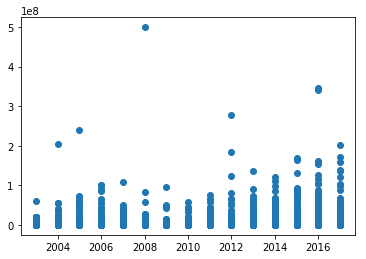

In [404]:
plt.scatter(x=housing_data["year_of_sale"],y=housing_data["sale_price"])

In [405]:
housing_data.sort_values(by="sale_price",ascending=False).tail(1)

,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
195441,3,FLATLANDS,02 TWO FAMILY HOMES,1,7761,45,NaN,B1,5712 AVENUE H,NaN,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,227.222452,1724.950388


In [406]:
housing_data['sale_price'].describe().apply(lambda x: format(x,'f'))

count       390883.000000
mean        506754.477693
std        2353964.664225
min              0.000000
25%              0.000000
50%         275000.000000
75%         593000.000000
max      499401179.000000
Name: sale_price, dtype: object

In [407]:
zero_price_houses = housing_data[housing_data['sale_price']==0]

In [408]:
len(zero_price_houses)

140143

In [409]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 110 entries, borough to SHAPE_Area
dtypes: float64(64), int64(10), object(36)
memory usage: 328.0+ MB


### There are 140143 instances where sale price is zero. Remove them

In [410]:
housing_data = housing_data[housing_data['sale_price']>0]

In [411]:
housing_data['sale_price'].describe().apply(lambda x: format(x,'f'))

count       250740.000000
mean        789988.476127
std        2900768.102545
min              1.000000
25%         300000.000000
50%         496860.000000
75%         755000.000000
max      499401179.000000
Name: sale_price, dtype: object

In [412]:
import numpy as np
pd.cut(np.array([1,4,8,12,16]), bins=[0,5,10,16], retbins=True,labels=['bad','medium','good'])

([bad, bad, medium, good, good]
 Categories (3, object): [bad < medium < good], array([ 0,  5, 10, 16]))

### Using cut function to put price values in bins

In [413]:
price_range_label = ['0-200k','200k-500k','500k-800k','800k-1min','1min-10min','10min-100min','100min-500min']
bins_range = [0,200000,500000,800000,1000000,10000000,100000000,500000000]
housing_data['price_range']=pd.cut(housing_data['sale_price'],bins=bins_range,labels=price_range_label)

In [414]:
housing_data[['price_range','sale_price']].head()

,price_range,sale_price
0,100min-500min,499401179.0
1,100min-500min,345000000.0
2,100min-500min,340000000.0
3,100min-500min,276947000.0
4,100min-500min,202500000.0


In [415]:
housing_data_test = housing_data[:5]

In [416]:
price_RangeDF = housing_data_test[['year_of_sale','price_range']]

In [417]:
price_RangeDF

,year_of_sale,price_range
0,2008,100min-500min
1,2016,100min-500min
2,2016,100min-500min
3,2012,100min-500min
4,2017,100min-500min


In [418]:
housing_data_test_count=housing_data_test.groupby(['year_of_sale'])['price_range'].value_counts()

In [419]:
housing_data_test_count

year_of_sale  price_range  
2008          100min-500min    1
2012          100min-500min    1
2016          100min-500min    2
2017          100min-500min    1
Name: price_range, dtype: int64

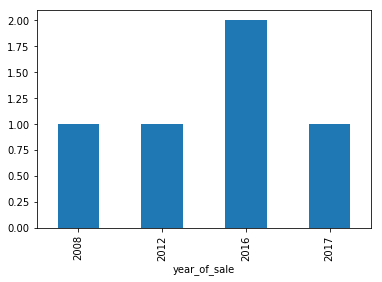

In [420]:
housing_data_test.groupby(['year_of_sale'])['price_range'].size().plot(kind='bar')

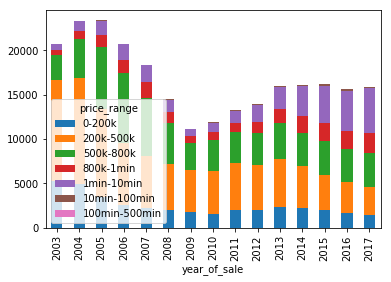

In [421]:
housing_data.groupby(['year_of_sale','price_range']).size().unstack().plot(kind='bar',stacked=True)

In [422]:
def conv(year):
    return housing_data[housing_data['year_of_sale']==year].groupby('price_range').size()

In [423]:
housing_data_conv = conv(2010)

In [424]:
x=housing_data_conv
percentage_total = x/sum(x)*100
percentage_total

price_range
0-200k           12.406110
200k-500k        41.412777
500k-800k        29.242974
800k-1min         7.950038
1min-10min        8.777112
10min-100min      0.210988
100min-500min     0.000000
dtype: float64

In [425]:
year_names = list(range(2003,2018))
perc_total = []

for year in year_names:
    x=conv(year)
    percentage_total = x/sum(x)*100
    perc_total.append(percentage_total)
    
df_years = pd.DataFrame(perc_total, index= year_names)
df_years.head()

price_range,0-200k,200k-500k,500k-800k,800k-1min,1min-10min,10min-100min,100min-500min
2003,25.461646,54.915385,13.335905,2.603539,3.567813,0.115713,0.000000
2004,21.107296,51.064378,19.313305,3.793991,4.557940,0.158798,0.004292
2005,14.819097,42.641833,29.685292,5.634768,6.962107,0.252623,0.004282
2006,12.325593,33.814513,37.816830,7.261140,8.448800,0.328296,0.004828
2007,11.976928,32.018284,35.517223,9.658813,10.496817,0.326495,0.005442


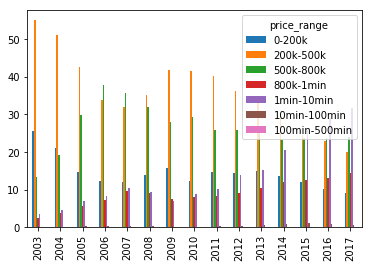

In [426]:
df_years.plot(kind='bar')


housing_df2.plot(kind='bar')

### Lavender and red colours bars are going higher every year suggesting that buyers of high range price are increasing. Lets analyse neighborhood



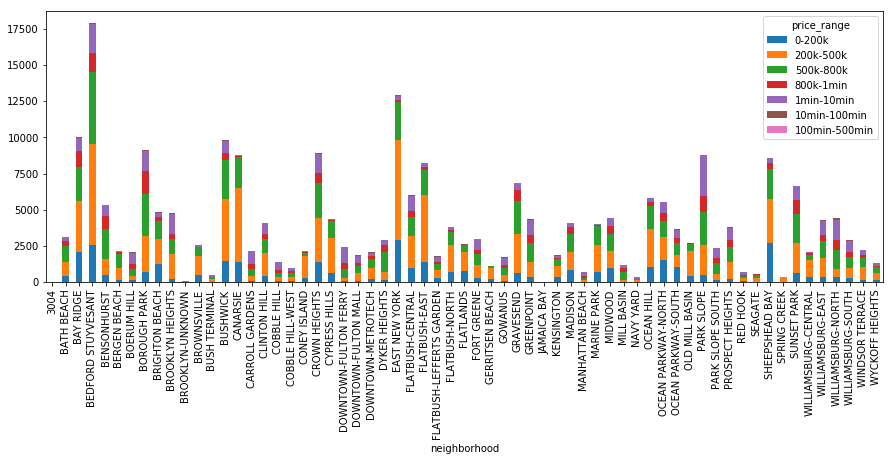

In [427]:
%matplotlib inline
housing_data.groupby(['neighborhood','price_range']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,5))
plt.show()

### Removing outliers using Interquartile Range

In [428]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5  * iqr)
    upper_bound = q3 + (1.5 * iqr)
    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

housing_data_cleaned = remove_outlier(housing_data,"sale_price")



In [429]:
len(housing_data_cleaned)

231108

### Dropping all columns which have less than 75 % non NA values

In [430]:
threshold = len(housing_data_cleaned)*0.75

In [431]:
housing_data_cleaned.dropna(thresh=threshold,axis=1,inplace=True)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Remove unused or duplicate columns

In [433]:
housing_data_cleaned = housing_data_cleaned.drop(['APPBBL','BoroCode','Borough','BBL','PLUTOMapID','YearBuilt','CondoNo','BuiltFAR','FireComp','MAPPLUTO_F','Sanborn','SanitBoro','Version', 'block','borough','Address','OwnerName','zip_code'],axis=1)

In [435]:
housing_data_cleaned.shape

(231108, 73)

In [381]:
#13, 13, 13, 13, 14, 14, 16, 18, 21

#So the median is 14.

#The mode is the number that is repeated more often than any other, so 13 is the mode.

#housing_data_cleaned.head(5)['BsmtCode']

In [436]:
housing_data_cleaned['BsmtCode'] = housing_data_cleaned['BsmtCode'].fillna(5)

### Fill NA data with 0

In [437]:
#Community Area- not applicable or available if Na
housing_data_cleaned[['ComArea','CommFAR','FacilFAR','FactryArea','RetailArea','ProxCode','YearAlter1','YearAlter2']] = housing_data_cleaned[['ComArea','CommFAR','FacilFAR','FactryArea','RetailArea','ProxCode','YearAlter1','YearAlter2']].fillna(0)


### Fill NA data with mode

In [438]:
housing_data_cleaned[['XCoord','YCoord','ZipCode','LotType','SanitDistr','HealthArea','HealthCent','PolicePrct','SchoolDist','tax_class_at_sale','CD','Council']] = housing_data[['XCoord','YCoord','ZipCode','LotType','SanitDistr','HealthArea','HealthCent','PolicePrct','SchoolDist','tax_class_at_sale','CD','Council']].apply(lambda x: x.fillna(x.mode()[0]))

In [442]:
housing_data_cleaned.shape
housing_data_cleaned_backup=housing_data_cleaned

In [448]:
housing_data_cleaned_rm=housing_data_cleaned.drop(columns=housing_data_cleaned_num_col.columns,axis=1)

housing_data_cleaned.info()

In [455]:
housing_data_cleaned_rm.shape

(231108, 14)

In [478]:
housing_data_cleaned_refined_withoutNAN=housing_data_cleaned_rm.join(other=imputed_df,how='left',right_index=True, left_index=True)

TypeError: join() got an unexpected keyword argument 'right_index'

### Here i am stuck

In [477]:
df1=housing_data_cleaned_rm
df2=imputed_df

df_combine = pd.merge(df1, df2)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [468]:
housing_data_cleaned_rm.shape,imputed_df.shape,housing_data_cleaned_refined_withoutNAN.shape

((231108, 14), (231108, 59), (231108, 73))

In [484]:
# Checking categorical data
category_dataframe=housing_data_cleaned.select_dtypes(exclude=[np.number])

In [488]:
test_cat = category_dataframe[['neighborhood','price_range']]

In [489]:
from sklearn.preprocessing import OneHotEncoder

In [490]:
drop_enc = OneHotEncoder().fit(test_cat)

In [494]:
val=drop_enc.transform(test_cat)

In [501]:
drop_enc.get_feature_names()

array([u'x0_3004', u'x0_BATH BEACH', u'x0_BAY RIDGE',
       u'x0_BEDFORD STUYVESANT', u'x0_BENSONHURST', u'x0_BERGEN BEACH',
       u'x0_BOERUM HILL', u'x0_BOROUGH PARK', u'x0_BRIGHTON BEACH',
       u'x0_BROOKLYN HEIGHTS', u'x0_BROOKLYN-UNKNOWN', u'x0_BROWNSVILLE',
       u'x0_BUSH TERMINAL', u'x0_BUSHWICK', u'x0_CANARSIE',
       u'x0_CARROLL GARDENS', u'x0_CLINTON HILL', u'x0_COBBLE HILL',
       u'x0_COBBLE HILL-WEST', u'x0_CONEY ISLAND', u'x0_CROWN HEIGHTS',
       u'x0_CYPRESS HILLS', u'x0_DOWNTOWN-FULTON FERRY',
       u'x0_DOWNTOWN-FULTON MALL', u'x0_DOWNTOWN-METROTECH',
       u'x0_DYKER HEIGHTS', u'x0_EAST NEW YORK', u'x0_FLATBUSH-CENTRAL',
       u'x0_FLATBUSH-EAST', u'x0_FLATBUSH-LEFFERTS GARDEN',
       u'x0_FLATBUSH-NORTH', u'x0_FLATLANDS', u'x0_FORT GREENE',
       u'x0_GERRITSEN BEACH', u'x0_GOWANUS', u'x0_GRAVESEND',
       u'x0_GREENPOINT', u'x0_JAMAICA BAY', u'x0_KENSINGTON',
       u'x0_MADISON', u'x0_MANHATTAN BEACH', u'x0_MARINE PARK',
       u'x0_MIDWOOD', u'x0_

### one hot encoder will increase feature length of two feature address,price-range to 68.Hence not suitable in this scenario.

In [509]:
set(['hello','world','hello','GG'])

{'GG', 'hello', 'world'}

In [512]:
#Map is used for substituting each value in a Series with another value
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

### Make a set of categorical columns. make list of range and map categorical value to numerical value.
example
address = maple street, park avenue, high street


In [516]:
dict(zip(set(['maple street', 'park avenue', 'high street']),list(range(0,len(set(['maple street', 'park avenue', 'high street']))))))

{'high street': 2, 'maple street': 0, 'park avenue': 1}

In [519]:
mapping_dictionary=dict(zip(set(['maple street', 'park avenue', 'high street']),list(range(0,len(set(['maple street', 'park avenue', 'high street']))))))
address_names=pd.Series(['maple street', 'park avenue', 'high street'])
address_names.map(mapping_dictionary)

0    0
1    1
2    2
dtype: int64

In [514]:
def strnums(cols,df):
    return dict(zip(set(df[cols]),list(range(0,len(set(df[cols]))))))
for columns in set(housing_data_cleaned.select_dtypes(exclude='number')):
    housing_data_cleaned[columns] = housing_data_cleaned[columns].map(strnums(columns,housing_data_cleaned))

In [520]:
housing_data_cleaned.head(2)

,neighborhood,building_class_category,tax_class,lot,building_class,address,residential_units,commercial_units,total_units,land_sqft,...,CommFAR,FacilFAR,Tract2010,XCoord,YCoord,ZoneMap,TaxMap,SHAPE_Leng,SHAPE_Area,price_range
17076,30,6,5,24,152,122488,0,0,0,0.0,...,0.0,4.8,502.0,986392.0,192894.0,2,30106.0,393.470109,7482.061896,1
17077,55,14,3,72,46,53498,2,0,2,2489.0,...,0.0,2.0,207.0,993093.0,185529.0,8,30408.0,302.630161,2489.192890,1
